In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import numpy as np

In [2]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams["axes.labelsize"] = 23
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams['axes.titlesize'] = 28
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
datasets = [
    "dtd", 
    "flowers", 
    "fgvc_aircraft", 
    "sun397"
]
models = ['RN50', 'nllb-clip-base', 'ViT-B-32']

num_seeds = 4
out_path = "../output"
sample_sizes = {
    "dtd": [2, 4, 8, 16, 32, 46, 60], 
    "fgvc_aircraft": [2, 4, 8, 14, 20], 
    "sun397": [2, 4, 8, 16, 23, 30], 
    "flowers": [2, 4, 8, 14, 20],
}

color1 = "mediumblue"
color5 = "fuchsia"

In [6]:
def load_result(dataset, model, sample_size, seed):
    templates = f"{dataset}/sample_size_{sample_size:02d}_seed_{seed}"
    with open(os.path.join(out_path, f"{model}/{templates}.json"), 'r') as f:
        result = json.load(f)
    return result["metrics"]["acc1"], result["metrics"]["acc5"]

def create_ax(ax, dataset, model):
    ns = sample_sizes[dataset]
    acc1 = np.zeros(shape=(len(ns), num_seeds))
    acc5 = np.zeros(shape=(len(ns), num_seeds))
    for i, n in enumerate(ns):
        for j, seed in enumerate(range(num_seeds)):
            acc1[i, j], acc5[i, j] = load_result(dataset, model, n, seed)
    for j, seed in enumerate(range(num_seeds)):
        ax.plot(ns, acc1[:, j], color=color1, alpha=0.5, linewidth=0.5)
        ax.plot(ns, acc5[:, j], color=color5, alpha=0.5, linewidth=0.5)
    ax.plot(ns, acc1.mean(axis=1), color=color1, linewidth=3, label="Top-1 Accuracy")
    ax.plot(ns, acc5.mean(axis=1), color=color5, linewidth=3, label="Top-5 Accuracy")


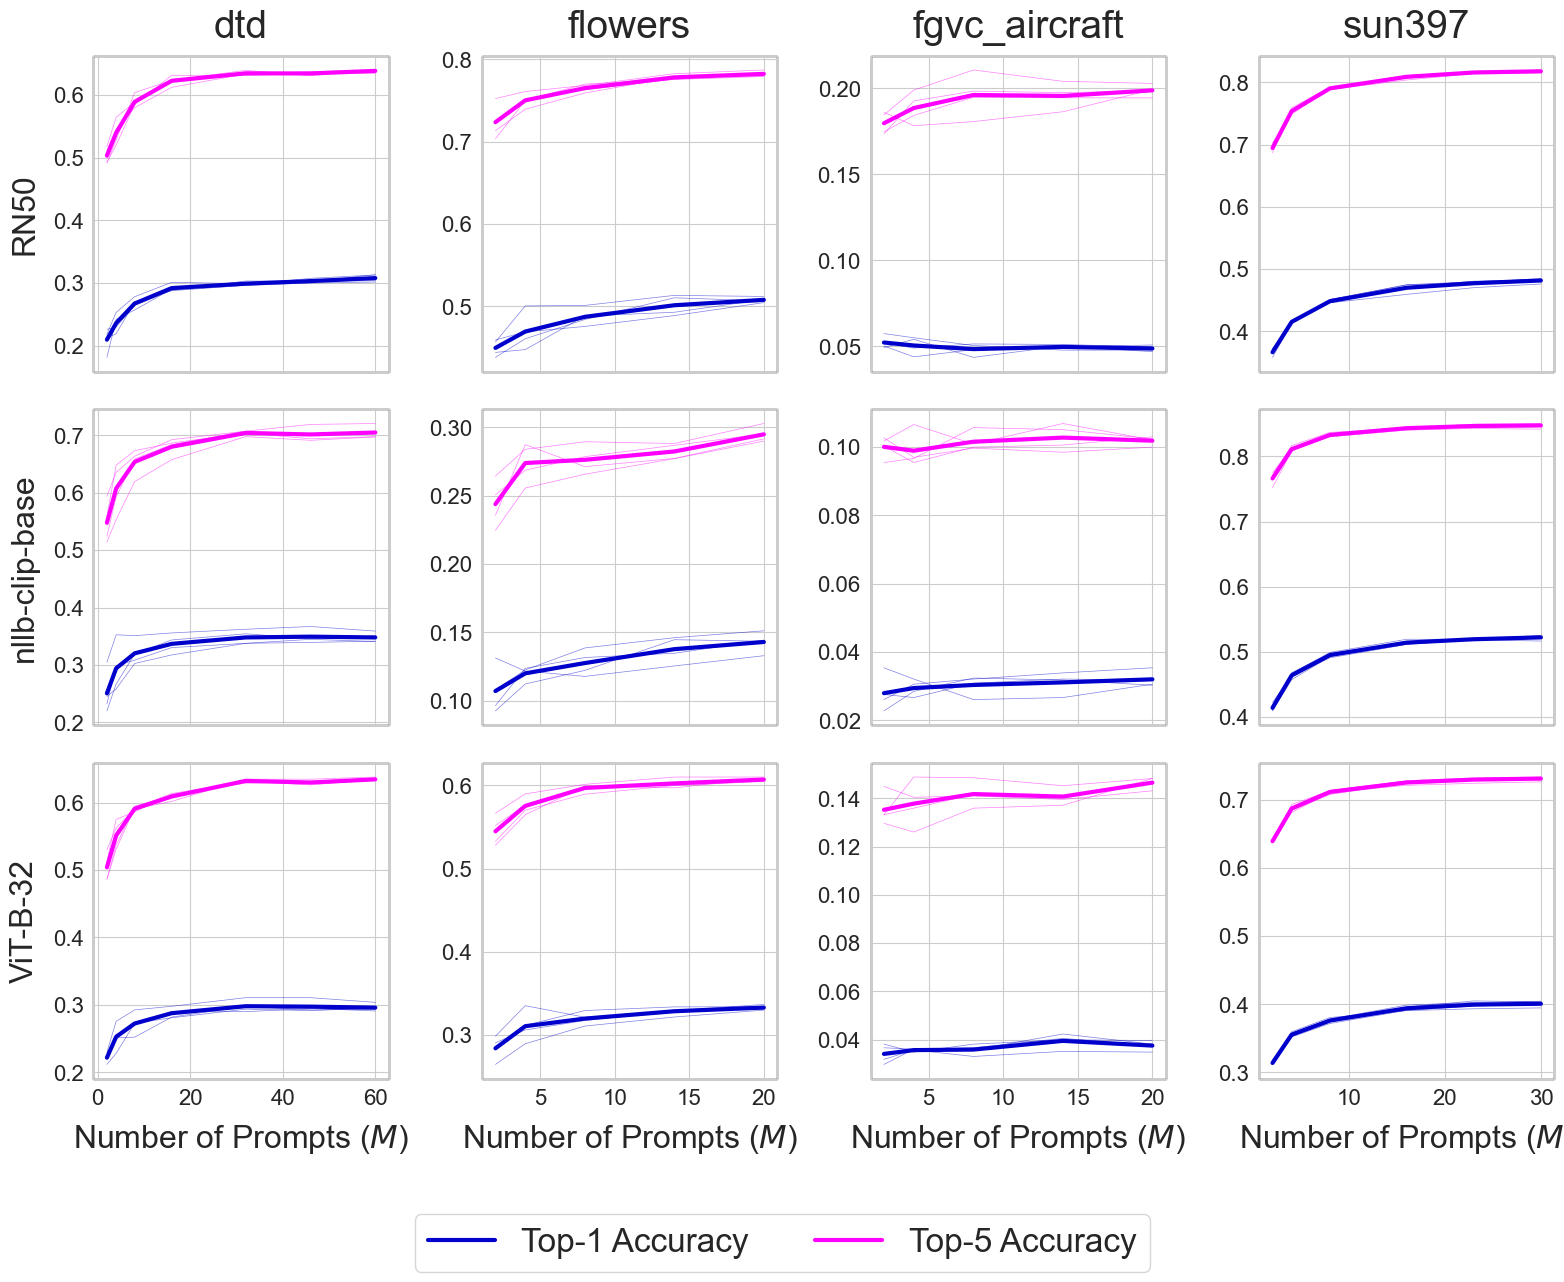

In [8]:
sns.set_style("whitegrid")

scale = 4
fig, axes = plt.subplots(len(models), len(datasets), figsize=(scale * len(datasets), scale * len(models)), sharex="col")

for i, model in enumerate(models):
    axes[i, 0].set_ylabel(model, labelpad=10)
    for j, dataset in enumerate(datasets):
        axes[i, j].patch.set_edgecolor('black')  
        axes[i, j].patch.set_linewidth(1)  
        if i == 0:
            axes[i, j].set_title(dataset, y=1.03)
        if i == len(models) - 1:
            axes[i, j].set_xlabel(r"Number of Prompts ($M$)", labelpad=10)
        create_ax(axes[i, j], dataset, model)

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, -0.05), ncol=2)

fig.tight_layout(pad=2.0)
plt.show()